# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('coaster_db.csv')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# Step 1: Data Understanding¶
- Dataframe shape
- head and tail
- dtypes
- describe

In [3]:
df.shape

(1087, 56)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df = df[['coaster_name','Location', 'Status','Type', 'Manufacturer','Height', 'height_ft', 'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph', 'Inversions_clean']].copy()

In [8]:
df

,coaster_name,Location,Status,Type,Manufacturer,Height,height_ft,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,Inversions_clean
0,Switchback Railway,Coney Island,Removed,Wood,LaMarcus Adna Thompson,50 ft (15 m),NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,0
1,Flip Flap Railway,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,1
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,0
3,Loop the Loop (Coney Island),Other,Removed,Steel,Edwin Prescott,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,1
4,Loop the Loop (Young's Pier),Other,Removed,Steel,Edwin Prescott,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Steel,Anton Schwarzkopf,111 ft (34 m),NaN,2022,NaN,NaN,Steel,NaN,53.0,3
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Steel – Launched,Intamin,178 ft (54 m),NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,2
1084,Tron Lightcycle Power Run,Other,NaN,Steel – Launched,Vekoma,78.1 ft (23.8 m),NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,0
1085,Tumbili,Kings Dominion,Under construction,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,112 ft (34 m),NaN,2022,NaN,NaN,Steel,NaN,34.0,0


In [9]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Type                   object
Manufacturer           object
Height                 object
height_ft             float64
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
Inversions_clean        int64
dtype: object

In [10]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [11]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Type                          object
Manufacturer                  object
Height                        object
height_ft                    float64
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
Inversions_clean               int64
dtype: object

In [12]:
#rename the columns
df = df.rename(columns={
    'Location': 'location',
    'Status': 'status',
    'Type': 'type',
    'Manufacturer': 'manufacturer',
    'Type_Main': 'type_main',
    'opening_date_clean':'opening_date',
    'Inversions_clean':'inversions',
    'Height':'height',
})

In [13]:
df.dropna(subset=['status', 'height', 'latitude', 'longitude', 'opening_date', 'speed_mph', 'manufacturer'], inplace=True)

In [14]:
df.isna().sum()

coaster_name         0
location             0
status               0
type                 0
manufacturer         0
height               0
height_ft          522
year_introduced      0
latitude             0
longitude            0
type_main            0
opening_date         0
speed_mph            0
inversions           0
dtype: int64

In [15]:
df.shape

(652, 14)

In [16]:
df.duplicated()

0       False
13      False
22      False
23      False
26      False
        ...  
1072    False
1076    False
1079    False
1081    False
1083    False
Length: 652, dtype: bool

In [17]:
# check for duplicated coaster names
df.loc[df.duplicated(subset=['coaster_name'])]

,coaster_name,location,status,type,manufacturer,height,height_ft,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,inversions
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Wood,Traver Engineering,96 ft (29 m),NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,0
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Steel – Powered – Mine Train,Mack Rides,10 m (33 ft),32.8,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,0
347,Wild Mouse (Idlewild),Idlewild and Soak Zone,Operating,Steel,Vekoma,56 ft (17 m),NaN,1993,40.2598,-79.2799,Steel,1985-01-01,30.0,0
724,Flying Fish (roller coaster),Thorpe Park,Operating,Steel,Mack Rides,20 ft (6.1 m),NaN,2007,51.4052,-0.5139,Steel,1984-01-01,16.8,0
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,Steel – Shuttle – Boomerang,Vekoma,120 ft (37 m),NaN,2007,52.5075,1.7434,Steel,2007-01-01,50.0,6
780,Afterburn (roller coaster),Carowinds,Operating,Steel – Inverted,Bolliger & Mabillard,113 ft (34 m),NaN,2009,35.1003,-80.9409,Steel,1999-03-20,62.0,6
799,Superman The Ride,Six Flags New England,Operating,Steel,Intamin,208 ft (63 m),NaN,2009,42.0386,-72.6114,Steel,2000-05-05,77.0,0
808,Dragon Challenge,Other,Removed,Steel – Inverted – Dueling,Bolliger & Mabillard,125 ft (38.1 m),NaN,2010,28.4736,-81.4733,Steel,1999-05-28,60.0,5
819,Raptor Attack,Lightwater Valley,Closed in 2021,Steel – Enclosed,Anton Schwarzkopf,50 ft (15 m),NaN,2010,54.1739,-1.5687,Steel,1987-04-02,40.0,0
859,Arkham Asylum – Shock Therapy,Warner Bros. Movie World,SBNO December 2019,Steel – Inverted,Vekoma,33.3 m (109 ft),109.3,2012,-27.9083,153.3119,Steel,1995-12-26,54.7,5


In [18]:
df.query('coaster_name == "La Vibora"')

,coaster_name,location,status,type,manufacturer,height,height_ft,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,inversions


In [19]:
# delete duplicates
df = df.loc[~df.duplicated(subset=['coaster_name', 'location', 'opening_date'])].reset_index(drop=True)

In [20]:
df

,coaster_name,location,status,type,manufacturer,height,height_ft,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,inversions
0,Switchback Railway,Coney Island,Removed,Wood,LaMarcus Adna Thompson,50 ft (15 m),NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,0
1,Racer (1910 roller coaster),Kennywood,Operating,Wood – Racing,Charlie Mach,72.5 ft (22.1 m),NaN,1910,40.3869,-79.8619,Wood,1927-01-01,40.0,0
2,Jack Rabbit (Kennywood),Kennywood,Operating,Wood,Harry C. Baker,40 ft (12 m),NaN,1920,40.3867,-79.8628,Wood,1920-01-01,45.0,0
3,Jack Rabbit (Seabreeze),Seabreeze Amusement Park,Operating,Wood,Harry C. Baker,75 ft (23 m),NaN,1920,43.2316,-77.5432,Wood,1920-01-01,42.0,0
4,Big Dipper (Blackpool Pleasure Beach),Blackpool Pleasure Beach,Operating,Wood – Out and back,William Strickler,65 ft (20 m),NaN,1923,53.7892,-3.0569,Wood,1923-08-23,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Aquaman: Power Wave,Six Flags Over Texas,Under construction,Steel – Shuttle – Launched,Mack Rides,146.3 ft (44.6 m),NaN,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,0
627,Emperor (roller coaster),SeaWorld San Diego,Under construction,Steel,Bolliger & Mabillard,153 ft (47 m),NaN,2022,32.7640,-117.2224,Steel,2022-03-01,63.0,4
628,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Steel – Launched,Premier Rides,93 ft (28 m),NaN,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,0
629,Leviathan (Sea World),Sea World,Under construction,Wood,Martin & Vleminckx,32 m (105 ft),105.0,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,0


In [21]:
df.shape

(631, 14)

# Step 3: Feature Understanding

- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

Text(0, 0.5, 'Number of Coasters')

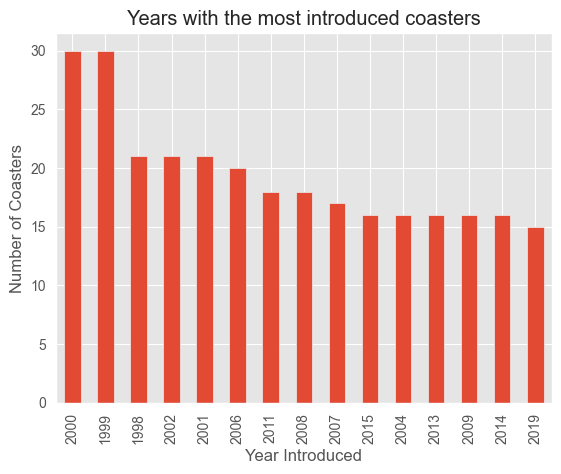

In [22]:
ax = df['year_introduced'].value_counts().head(15).plot(kind='bar', title='Years with the most introduced coasters')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Number of Coasters')

Text(0.5, 0, 'Speed (mph)')

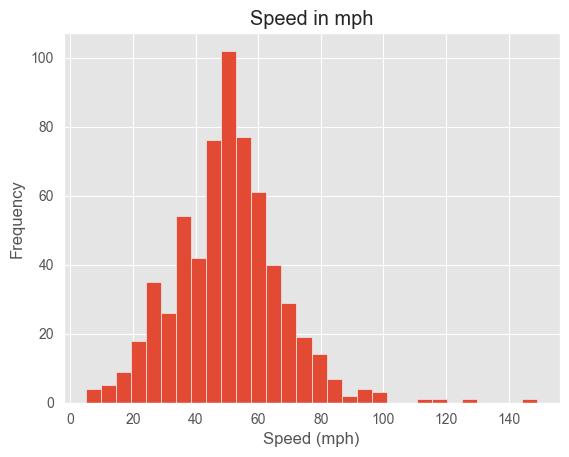

In [23]:
ax = df['speed_mph'].plot(kind='hist', title='Speed in mph', bins=30)
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

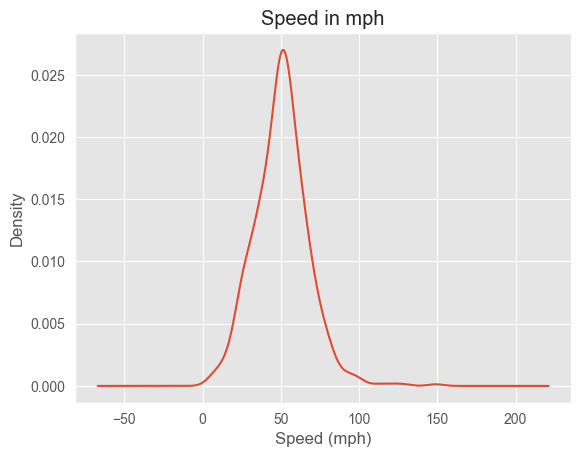

In [24]:
ax = df['speed_mph'].plot(kind='kde', title='Speed in mph')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [25]:
height15 = df['height'].value_counts().head(15)

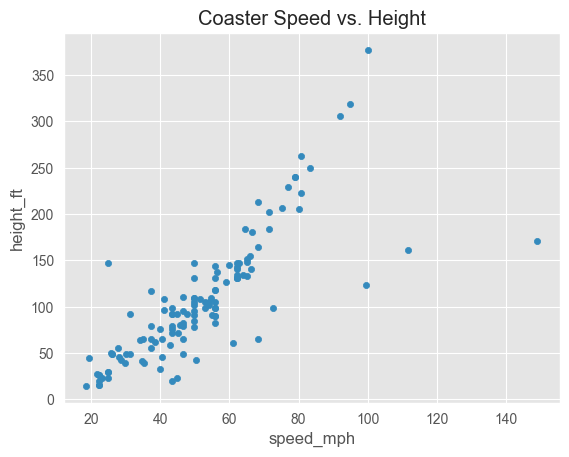

In [27]:

df.plot(kind='scatter',
        x='speed_mph',
        y='height_ft',
        title='Coaster Speed vs. Height')
plt.show()

<Axes: xlabel='speed_mph', ylabel='height_ft'>

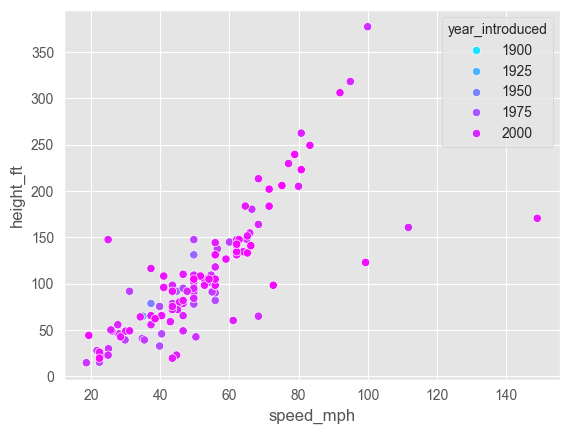

In [32]:
sns.scatterplot(x='speed_mph', y='height_ft', data=df, hue='year_introduced', palette='cool')

In [33]:
df.columns

Index(['coaster_name', 'location', 'status', 'type', 'manufacturer', 'height',
       'height_ft', 'year_introduced', 'latitude', 'longitude', 'type_main',
       'opening_date', 'speed_mph', 'inversions'],
      dtype='object')

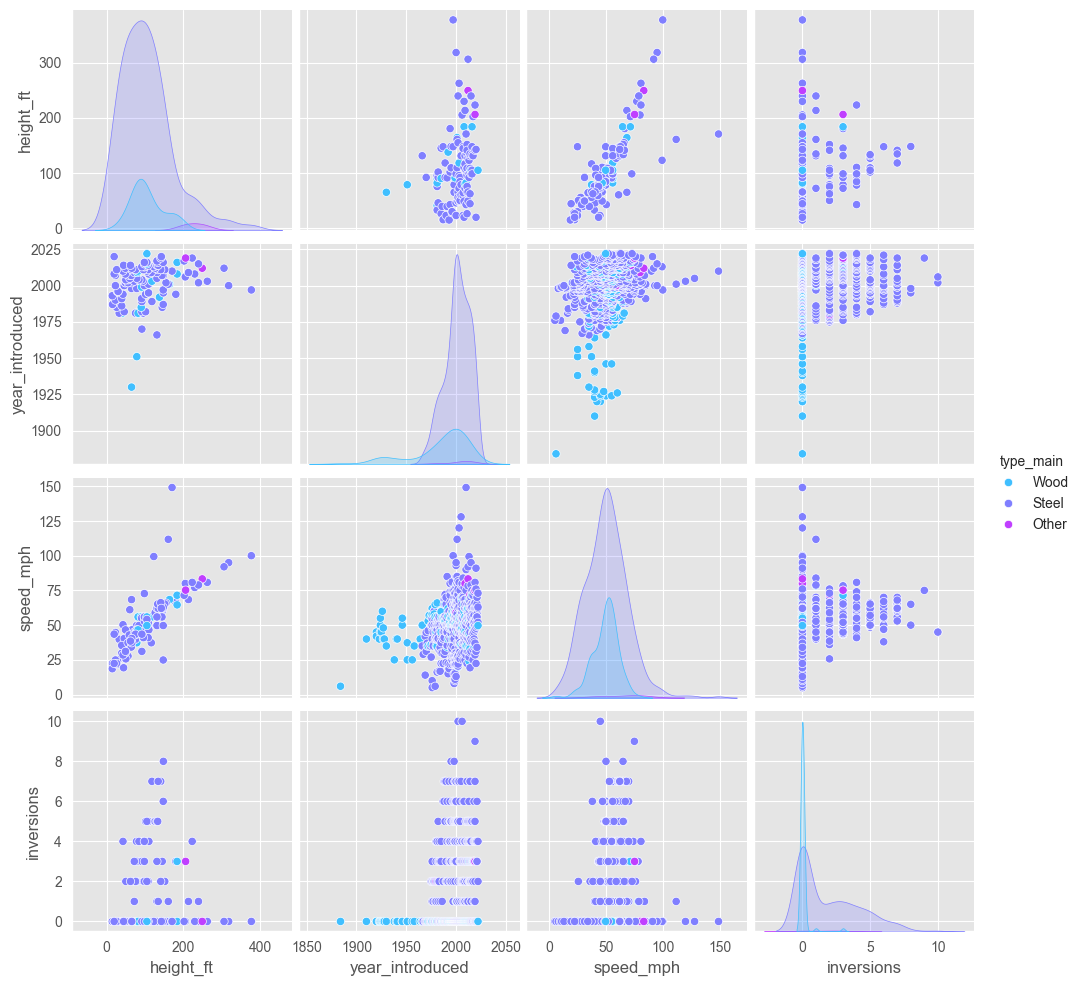

In [38]:
sns.pairplot(df, vars=['height_ft', 'year_introduced', 'speed_mph', 'inversions'], hue='type_main', palette='cool')
plt.show()

In [40]:
df_corr = df[['height_ft', 'year_introduced', 'speed_mph', 'inversions']].corr()


<Axes: >

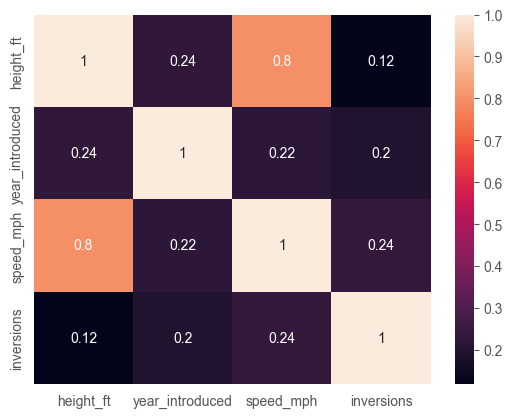

In [42]:
sns.heatmap(df_corr, annot=True)

# Ask Questions 

In [43]:
df['location'].value_counts()

location
Other                                      19
Cedar Point                                18
Kings Island                               17
Six Flags Magic Mountain                   16
Canada's Wonderland                        12
Hersheypark                                12
Carowinds                                  12
Six Flags Great Adventure                  11
Alton Towers                               10
Busch Gardens Williamsburg                 10
Kings Dominion                              9
Dreamworld                                  8
Knott's Berry Farm                          8
Worlds of Fun                               8
Linnanmäki                                  8
Six Flags Over Texas                        7
Valleyfair                                  7
Six Flags Great America                     7
Efteling                                    7
Kennywood                                   7
Six Flags Over Georgia                      7
Movie Park Germany       

In [44]:
df['speed_mph'].value_counts()

speed_mph
50.0     38
55.0     29
49.7     23
45.0     23
40.0     22
60.0     19
55.9     18
35.0     17
43.5     13
62.1     13
65.0     13
70.0     11
37.3     10
48.0     10
56.0     10
51.0     10
52.0     10
62.0      9
41.0      9
46.6      9
31.1      8
47.0      8
25.0      8
22.4      8
58.0      8
57.0      7
75.0      7
59.0      6
67.0      6
28.0      6
52.8      6
53.0      6
21.7      5
44.0      5
65.2      5
80.0      5
68.4      5
36.0      5
27.0      5
34.2      5
37.0      4
26.0      4
24.9      4
63.0      4
85.0      4
30.0      4
68.0      4
73.0      4
33.0      3
72.0      3
15.0      3
54.7      3
29.1      3
42.0      3
71.5      3
38.0      3
34.0      3
31.0      3
53.7      3
100.0     2
27.7      2
43.0      2
38.5      2
78.3      2
47.8      2
61.0      2
80.8      2
76.0      2
65.9      2
95.0      2
78.9      2
6.0       2
10.0      2
39.8      2
50.3      2
44.7      2
74.0      2
66.0      2
54.1      2
40.4      2
46.0      2
90.0      1
149.1 

In [46]:
# what are the locations with the fastest roller coasters ?

df_fast = df.query('speed_mph > 90')
df_fast

,coaster_name,location,status,type,manufacturer,height,height_ft,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,inversions
230,Superman: Escape from Krypton,Other,Operating,Steel – Launched – Shuttle – Dueling,Intamin,415 ft (126.5 m),NaN,1997,34.4250,-118.5980,Steel,1997-03-15,100.0,0
232,Tower of Terror II,Dreamworld,Removed,Steel – Launched – Shuttle,Intamin,115 m (377 ft),377.3,1997,-27.8641,153.3174,Steel,1997-01-23,100.0,0
304,Millennium Force,Cedar Point,Operating,Steel,Intamin,310 ft (94 m),NaN,2000,41.4817,-82.6881,Steel,2000-05-13,93.0,0
309,Steel Dragon 2000,Nagashima Spa Land,Operating,Steel,D. H. Morgan Manufacturing,97 m (318 ft),318.2,2000,35.0312,136.7301,Steel,2000-08-01,95.0,0
322,Do-Dodonpa,Fuji-Q Highland,Closed,Steel,S&S – Sansei Technologies,49 m (161 ft),160.8,2001,35.4877,138.7823,Steel,2001-12-21,111.8,1
367,Top Thrill Dragster,Cedar Point,Closed,Steel – Launched,Intamin,420 ft (130 m),NaN,2003,41.4840,-82.6862,Steel,2003-05-04,120.0,0
393,Kingda Ka,Six Flags Great Adventure,Operating,Steel – Launched,Intamin,456 ft (139 m),NaN,2005,40.1392,-74.4365,Steel,2005-05-21,128.0,0
472,Formula Rossa,Ferrari World Abu Dhabi,Operating,Steel – Launched,Intamin,52 m (170.6 ft),170.6,2010,24.4842,54.6124,Steel,2010-11-04,149.1,0
502,Leviathan (Canada's Wonderland),Canada's Wonderland,Operating,Steel,Bolliger & Mabillard,93.3 m (306 ft),306.1,2012,43.8445,-79.5424,Steel,2012-05-06,92.0,0
523,Ring Racer,Nürburgring,Closed,Steel – Launched,S&S - Sansei Technologies,37.5 m (123 ft),123.0,2013,50.3361,6.9492,Steel,2013-10-31,99.4,0


<Axes: xlabel='speed_mph', ylabel='location'>

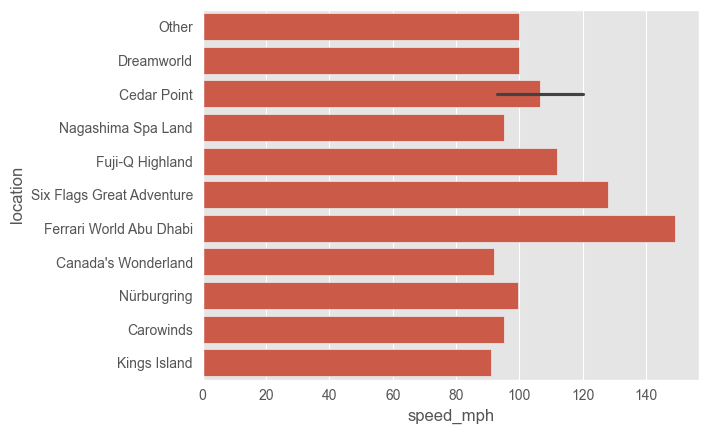

In [48]:

sns.barplot(df_fast, y='location', x='speed_mph')

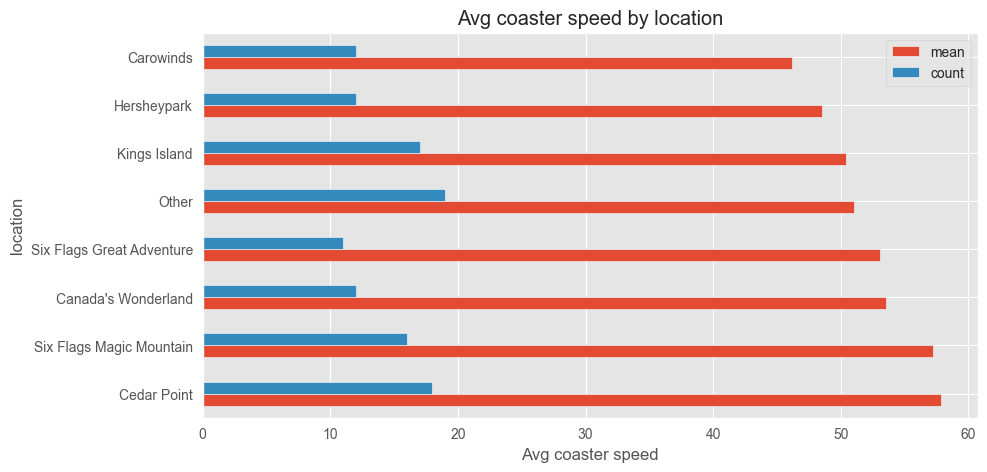

In [53]:
# what are the locations with the fastest roller coasters with the minimum of 10 coasters in the same location?
ax = df.query('location != "Others" ').groupby('location')['speed_mph'].agg(['mean', 'count']).query('count > 10').sort_values('mean', ascending=False).plot(kind='barh', figsize=(10, 5), title='Avg coaster speed by location')
ax.set_xlabel('Avg coaster speed')
plt.show()